In [79]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from category_encoders import *

In [80]:
df = pd.read_csv("/Users/shyam.muralidharan/Downloads/Revlon Dataset Updated Aug 2019.csv")
df.head()

,Channel,Category,Sub Category,Manufacturer,Brand,Revenue,Date,Units,Price,Price Tier
0,MASS,FRAG MASS,WOMEN,CHANEL INC,CHANEL,0.0,8/1/2017,82,0,a.less than $25
1,PRESTIGE,FRAGRANCES,MEN,CHANEL INC,CHANEL,6253422.0,8/1/2017,23,271888,d.$100+
2,PRESTIGE,FRAGRANCES,WOMEN,CHANEL INC,CHANEL,17512844.0,8/1/2017,87,201297,d.$100+
3,PRESTIGE,MAKEUP,MAKEUP TOTAL ALL OTHER,CHANEL INC,CHANEL,-957.0,8/1/2017,58,-17,a.less than $25
4,PRESTIGE,MAKEUP,MAKEUP TOTAL EYE,CHANEL INC,CHANEL,3763488.0,8/1/2017,56,67205,c.$50 - $100


In [81]:
df = df.drop(['Date'], axis = 1)


In [82]:
df

,Channel,Category,Sub Category,Manufacturer,Brand,Revenue,Units,Price,Price Tier
0,MASS,FRAG MASS,WOMEN,CHANEL INC,CHANEL,0.0,82,0,a.less than $25
1,PRESTIGE,FRAGRANCES,MEN,CHANEL INC,CHANEL,6253422.0,23,271888,d.$100+
2,PRESTIGE,FRAGRANCES,WOMEN,CHANEL INC,CHANEL,17512844.0,87,201297,d.$100+
3,PRESTIGE,MAKEUP,MAKEUP TOTAL ALL OTHER,CHANEL INC,CHANEL,-957.0,58,-17,a.less than $25
4,PRESTIGE,MAKEUP,MAKEUP TOTAL EYE,CHANEL INC,CHANEL,3763488.0,56,67205,c.$50 - $100
...,...,...,...,...,...,...,...,...,...
6870,PRESTIGE,MAKEUP,MAKEUP TOTAL FACE,LOREAL INC,URBAN DECAY,15440296.0,52,296929,d.$100+
6871,PRESTIGE,MAKEUP,MAKEUP TOTAL LIP,LOREAL INC,URBAN DECAY,2679173.0,94,28502,c.$50 - $100
6872,PRESTIGE,MAKEUP,MAKEUP TOTAL NAIL,LOREAL INC,URBAN DECAY,458.0,89,5,a.less than $25
6873,PRESTIGE,MAKEUP,MAKEUP TOTAL SETS,LOREAL INC,URBAN DECAY,609980.0,10,60998,c.$50 - $100


In [83]:
dims = ["Revenue", "Units"]
dim_1 = dims[0]
dim_2 = dims[1]
df['ratio'] = df[dim_1]/df[dim_2]
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df.isnull().values.any()
df.isnull().sum()


Channel         0
Category        0
Sub Category    0
Manufacturer    0
Brand           0
Revenue         0
Units           0
Price           0
Price Tier      0
ratio           0
dtype: int64

In [84]:
nwe = df['ratio'][df['Brand'] == 'CHANEL'].sum()
nwe

100701579.40798967

In [86]:
brand_list = list(df['Manufacturer'].unique())
# revenue = list(df.iloc[:,5:8].columns)
revenue = list(df.loc[:, ['ratio']])

In [70]:
revenue

['ratio']

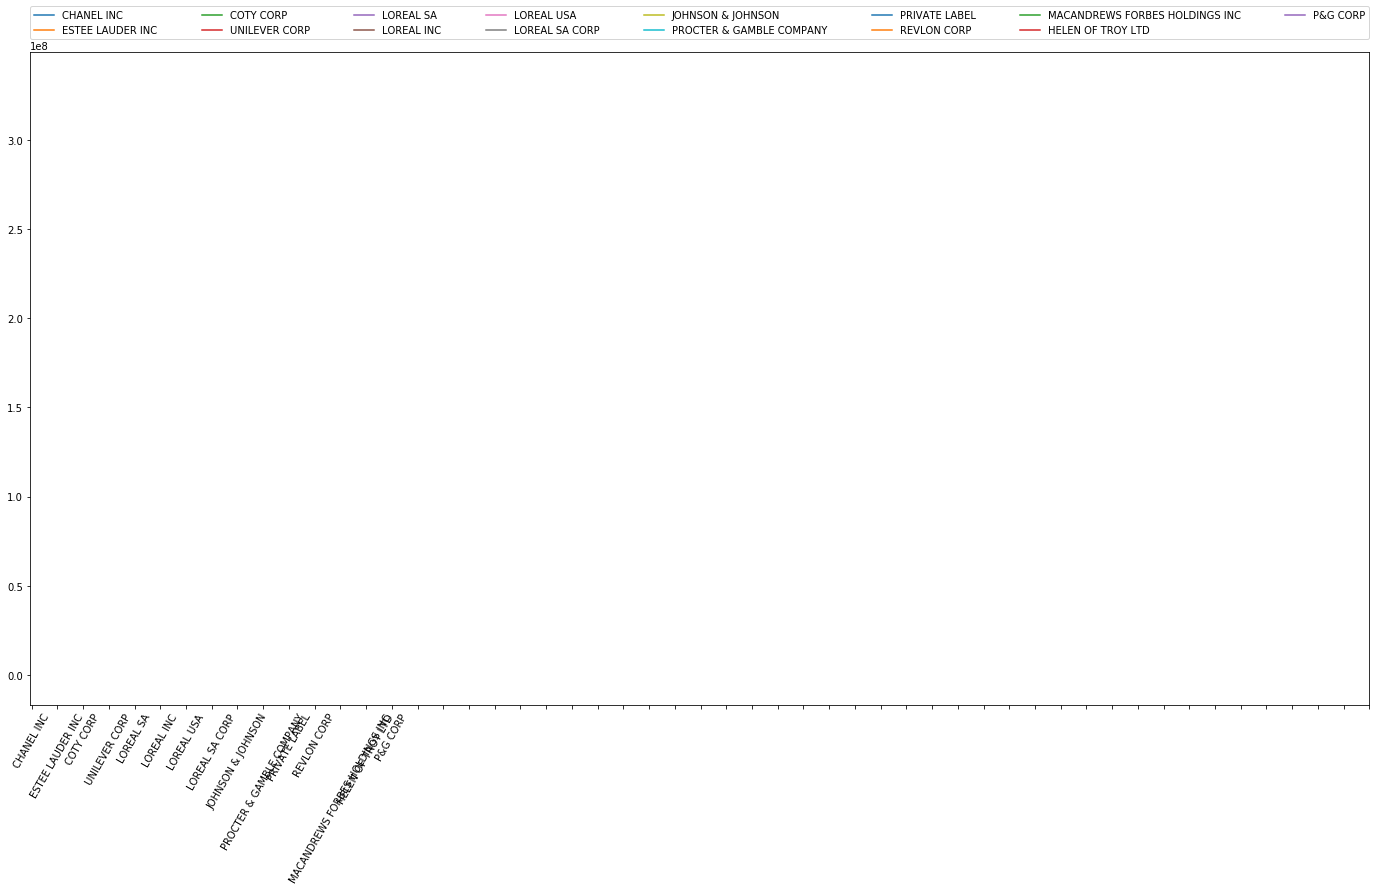

In [71]:
plt.figure(figsize=(24,12))
for ar in brand_list:
    revenue_produce = []
    for yr in revenue:
        revenue_produce.append(df[yr][df['Manufacturer'] == ar].sum())
    plt.plot(revenue_produce, label=ar)
plt.xticks(np.arange(53), tuple(brand_list), rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=8, mode="expand", borderaxespad=0.)

plt.show()

In [72]:
new_df_dict = {}
for ar in brand_list:
    yearly_produce = []
    for yr in revenue:
        yearly_produce.append(df[yr][df['Manufacturer']==ar].sum())
    new_df_dict[ar] = yearly_produce
new_df = pd.DataFrame(new_df_dict)

new_df.head()

,CHANEL INC,ESTEE LAUDER INC,COTY CORP,UNILEVER CORP,LOREAL SA,LOREAL INC,LOREAL USA,LOREAL SA CORP,JOHNSON & JOHNSON,PROCTER & GAMBLE COMPANY,PRIVATE LABEL,REVLON CORP,MACANDREWS FORBES HOLDINGS INC,HELEN OF TROY LTD,P&G CORP
0,1.007016e+08,3.323089e+08,7.183584e+07,9.295927e+07,9.953314e+07,2.534066e+08,135435.295517,2.777640e+08,7.235039e+07,1.029952e+08,6.281262e+07,8.664487e+07,519525.794543,2666.863857,6.867448e+07


In [73]:
# from sklearn import preprocessing
# # Get column names first
# names = new_df.columns
# # Create the Scaler object
# scaler = preprocessing.StandardScaler()
# # Fit your data on the scaler object
# scaled_df = scaler.fit_transform(new_df)
# new_df = pd.DataFrame(scaled_df, columns=names)
# new_df

In [74]:
new_df = pd.DataFrame.transpose(new_df)
new_df.columns = revenue

new_df.head()
new_df.shape

(15, 1)

In [75]:
new = new_df.shape[0]
new

15

In [76]:
mean_produce = []
for i in range(15):
    mean_produce.append(new_df.iloc[i,:].values.mean())
new_df['Mean_Produce'] = mean_produce

new_df['Rank'] = new_df['Mean_Produce'].rank(ascending=False)

new_df.head(30)

,ratio,Mean_Produce,Rank
CHANEL INC,1.007016e+08,1.007016e+08,5.0
ESTEE LAUDER INC,3.323089e+08,3.323089e+08,1.0
COTY CORP,7.183584e+07,7.183584e+07,10.0
UNILEVER CORP,9.295927e+07,9.295927e+07,7.0
LOREAL SA,9.953314e+07,9.953314e+07,6.0
LOREAL INC,2.534066e+08,2.534066e+08,3.0
LOREAL USA,1.354353e+05,1.354353e+05,14.0
LOREAL SA CORP,2.777640e+08,2.777640e+08,2.0
JOHNSON & JOHNSON,7.235039e+07,7.235039e+07,9.0
PROCTER & GAMBLE COMPANY,1.029952e+08,1.029952e+08,4.0


In [77]:
new_df

,ratio,Mean_Produce,Rank
CHANEL INC,1.007016e+08,1.007016e+08,5.0
ESTEE LAUDER INC,3.323089e+08,3.323089e+08,1.0
COTY CORP,7.183584e+07,7.183584e+07,10.0
UNILEVER CORP,9.295927e+07,9.295927e+07,7.0
LOREAL SA,9.953314e+07,9.953314e+07,6.0
LOREAL INC,2.534066e+08,2.534066e+08,3.0
LOREAL USA,1.354353e+05,1.354353e+05,14.0
LOREAL SA CORP,2.777640e+08,2.777640e+08,2.0
JOHNSON & JOHNSON,7.235039e+07,7.235039e+07,9.0
PROCTER & GAMBLE COMPANY,1.029952e+08,1.029952e+08,4.0


In [78]:
X = new_df.iloc[:,:-2].values

X = pd.DataFrame(X)
X 

,0
0,1.007016e+08
1,3.323089e+08
2,7.183584e+07
3,9.295927e+07
4,9.953314e+07
5,2.534066e+08
6,1.354353e+05
7,2.777640e+08
8,7.235039e+07
9,1.029952e+08


In [42]:
# from sklearn.cluster import KMeans
# wcss = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
# print(wcss)
# plt.plot(range(1,11),wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [43]:
wcss = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
            
print(wcss)

[1.4212654930544533e+17, 2.1098325560287604e+16, 5199870284021811.0, 2231843458304809.2, 533092909521382.75, 236452375659748.28, 83913653820383.31, 34207399258420.2, 14271592608139.287, 6480238301915.665]


In [44]:
from math import sqrt
x1, y1 = 1, wcss[0]
x2, y2 = 11, wcss[len(wcss)-1]

distances = []
for i in range(len(wcss)):
    x0 = i+2
    y0 = wcss[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)
    
print(distances.index(max(distances)) + 2)

4


In [45]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

/Users/shyam.muralidharan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [46]:
X

array([[1.00701579e+08],
       [3.32308900e+08],
       [7.18358409e+07],
       [9.29592669e+07],
       [9.95331385e+07],
       [2.53406609e+08],
       [1.35435296e+05],
       [2.77763970e+08],
       [7.23503872e+07],
       [1.02995153e+08],
       [6.28126245e+07],
       [8.66448696e+07],
       [5.19525795e+05],
       [2.66686386e+03],
       [6.86744840e+07]])

In [47]:
new_df['cluster'] = kmeans.labels_
new_df

,ratio,Mean_Produce,Rank,cluster
CHANEL INC,1.007016e+08,1.007016e+08,5.0,2
ESTEE LAUDER INC,3.323089e+08,3.323089e+08,1.0,3
COTY CORP,7.183584e+07,7.183584e+07,10.0,2
UNILEVER CORP,9.295927e+07,9.295927e+07,7.0,2
LOREAL SA,9.953314e+07,9.953314e+07,6.0,2
LOREAL INC,2.534066e+08,2.534066e+08,3.0,1
LOREAL USA,1.354353e+05,1.354353e+05,14.0,0
LOREAL SA CORP,2.777640e+08,2.777640e+08,2.0,1
JOHNSON & JOHNSON,7.235039e+07,7.235039e+07,9.0,2
PROCTER & GAMBLE COMPANY,1.029952e+08,1.029952e+08,4.0,2


In [48]:
import seaborn as sns
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,4,1),y=new_df.groupby(['cluster']).count()['Revenue'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

KeyError: 'Revenue'

<Figure size 864x504 with 0 Axes>

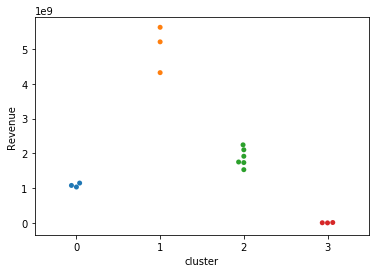

In [32]:
sns.swarmplot(new_df.cluster,new_df.Revenue)

In [49]:
size_array = list(new_df.groupby(['cluster']).count()['ratio'].values)
print(size_array)
# size_array.sort()
# size_array


[3, 2, 9, 1]


In [50]:
dis = {}
for i in range(len(size_array)):
    print(i)
    x= size_array[i]
    print(x)
    print("@@@@",size_array.index((size_array)[i]))
    print("$$$",(size_array)[i])
    new = new_df[new_df['cluster']== i].sample(x, replace=False)
    print(new)
    dis = new.to_dict()
    print(dis)
    
    

0
3
@@@@ 0
$$$ 3
                                        ratio   Mean_Produce  Rank  cluster
MACANDREWS FORBES HOLDINGS INC  519525.794543  519525.794543  13.0        0
HELEN OF TROY LTD                 2666.863857    2666.863857  15.0        0
LOREAL USA                      135435.295517  135435.295517  14.0        0
{'ratio': {'MACANDREWS FORBES HOLDINGS INC': 519525.79454304936, 'HELEN OF TROY LTD': 2666.863856769048, 'LOREAL USA': 135435.29551712738}, 'Mean_Produce': {'MACANDREWS FORBES HOLDINGS INC': 519525.79454304936, 'HELEN OF TROY LTD': 2666.863856769048, 'LOREAL USA': 135435.29551712738}, 'Rank': {'MACANDREWS FORBES HOLDINGS INC': 13.0, 'HELEN OF TROY LTD': 15.0, 'LOREAL USA': 14.0}, 'cluster': {'MACANDREWS FORBES HOLDINGS INC': 0, 'HELEN OF TROY LTD': 0, 'LOREAL USA': 0}}
1
2
@@@@ 1
$$$ 2
                       ratio  Mean_Produce  Rank  cluster
LOREAL SA CORP  2.777640e+08  2.777640e+08   2.0        1
LOREAL INC      2.534066e+08  2.534066e+08   3.0        1
{'ratio': {'LO

In [92]:
dis

{'Revenue': {'CHANEL': 1531116934.75,
  'REVLON': 1746853677.788,
  'COVER GIRL': 1752298319.0,
  'ESTEE LAUDER': 1753451362.0,
  'LANCOME': 1993707849.1090002,
  'MAC': 1416014402.0},
 'Price': {'CHANEL': 100701587.0,
  'REVLON': 87167060.0,
  'COVER GIRL': 71835845.0,
  'ESTEE LAUDER': 85466558.0,
  'LANCOME': 112893041.0,
  'MAC': 85233472.0},
 'Mean_Produce': {'CHANEL': 815909260.875,
  'REVLON': 917010368.894,
  'COVER GIRL': 912067082.0,
  'ESTEE LAUDER': 919458960.0,
  'LANCOME': 1053300445.0545001,
  'MAC': 750623937.0},
 'Rank': {'CHANEL': 8.0,
  'REVLON': 6.0,
  'COVER GIRL': 7.0,
  'ESTEE LAUDER': 5.0,
  'LANCOME': 4.0,
  'MAC': 9.0},
 'cluster': {'CHANEL': 3,
  'REVLON': 3,
  'COVER GIRL': 3,
  'ESTEE LAUDER': 3,
  'LANCOME': 3,
  'MAC': 3}}

In [123]:
import json

# as requested in comment
exDict = dis

with open('file.txt', 'w') as file:
     file.write(json.dumps(exDict))

In [124]:
new_df[new_df['cluster']==size_array.index(sorted(size_array)[0])].sample(10)


,Revenue,Units,Mean_Produce,Rank,cluster
URBAN DECAY,1.235282e+09,9536.0,6.176456e+08,10.0,0
OLAY,9.624620e+08,15296.0,4.812387e+08,18.0,0
DEGREE,1.065570e+09,6226.0,5.327881e+08,15.0,0
SECRET,1.032550e+09,7585.0,5.162787e+08,17.0,0
PRIVATE LABEL,1.077815e+09,41969.0,5.389287e+08,14.0,0
IT COSMETICS,1.097865e+09,10003.0,5.489375e+08,13.0,0
PANTENE,9.549141e+08,5221.0,4.774596e+08,19.0,0
DOVE,1.037733e+09,4930.0,5.188689e+08,16.0,0
NEUTROGENA,1.146375e+09,24108.0,5.731995e+08,11.0,0
GARNIER,1.136905e+09,17000.0,5.684612e+08,12.0,0


In [30]:
new_df[new_df['cluster']==size_array.index(sorted(size_array)[-1])].sample(6)

,Revenue,Units,Mean_Produce,Rank,cluster
MAC,1.416014e+09,12269.0,7.080133e+08,9.0,3
COVER GIRL,1.752298e+09,16156.0,8.761572e+08,6.0,3
REVLON,1.746854e+09,44258.0,8.734490e+08,7.0,3
LANCOME,1.993708e+09,22908.0,9.968654e+08,4.0,3
CHANEL,1.531117e+09,16310.0,7.655666e+08,8.0,3
ESTEE LAUDER,1.753451e+09,16948.0,8.767342e+08,5.0,3


In [35]:
new_df[new_df['cluster']==size_array.index(sorted(size_array)[1])].sample(9)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [33]:
new_df[new_df['cluster']==size_array.index(sorted(size_array)[2])].sample(1)

,Revenue,Units,Mean_Produce,Rank,cluster
LOREAL,3.899134e+09,40094.0,1.949587e+09,1.0,2


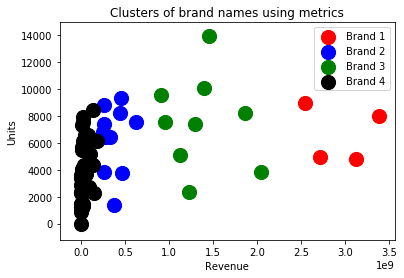

In [290]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=200,c='red',label='Brand 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=200,c='blue',label='Brand 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=200,c='green',label='Brand 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],s=200,c='black',label='Brand 4')


plt.title('Clusters of brand names using metrics')
plt.xlabel('Revenue')
plt.ylabel('Units')
plt.legend()
plt.show()

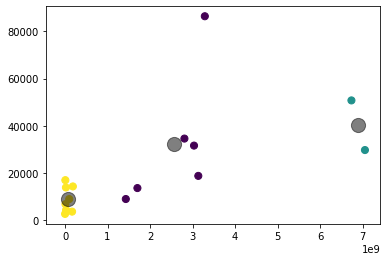

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [198]:
y_means

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [199]:
#######K means using pCs

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()

In [201]:
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

In [204]:
import pylab as pl

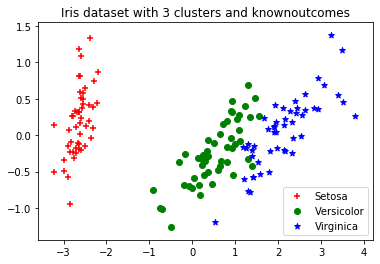

In [210]:
for i in range(0, pca_2d.shape[0]):
    if iris.target[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
         marker='+')
    elif iris.target[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
            marker='o')
    elif iris.target[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
            marker='*')
pl.legend([c1, c2, c3], ['Setosa', 'Versicolor',
    'Virginica'])
pl.title('Iris dataset with 3 clusters and knownoutcomes')
pl.show()

150

In [15]:
we = [{'name': 'FillRate', 'function': 'mean', 'business_friendly_name': 'Fill Rate', 'display_format': '@'}, {'name': 'FillRate', 'function': 'mean', 'business_friendly_name': 'Fill Rate', 'display_format': '&'}]
fish_list = [fish for fish in we if fish['display_format'] == '%']

In [16]:
fish_list

[]

In [91]:
import random
import string as st
passward = ''.join(random.choices(st.ascii_letters + st.digits, k =14))

In [92]:
passward


'hAThTWlZK1dbSL'

In [182]:
import pandas_profiling

In [183]:
df = pd.read_csv("/Users/shyam.muralidharan/Downloads/Revlon Dataset Updated Aug 2019.csv")

In [184]:
profile = pandas_profiling.ProfileReport(df)

/Users/shyam.muralidharan/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [185]:
profile.to_file(outputfile="./report.html")

ValueError: No tables found

In [11]:
df = pd.read_csv("/Users/shyam.muralidharan/Downloads/Revlon Dataset Updated Aug 2019.csv")

In [12]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [15]:
is_2018 =  df['year']==2018

In [17]:
gapminder_2002 = df[is_2018]
print(gapminder_2002.shape)

(3300, 11)


In [18]:
gapminder_2002.head()

,Channel,Category,Sub Category,Manufacturer,Brand,Revenue,Date,Units,Price,Price Tier,year
65,MASS,FRAG MASS,WOMEN,CHANEL INC,CHANEL,0.0,1/1/2018,82,0,a.less than $25,2018
66,PRESTIGE,FRAGRANCES,MEN,CHANEL INC,CHANEL,5127128.0,1/1/2018,65,78879,c.$50 - $100,2018
67,PRESTIGE,FRAGRANCES,WOMEN,CHANEL INC,CHANEL,13733659.0,1/1/2018,49,280279,d.$100+,2018
68,PRESTIGE,MAKEUP,MAKEUP TOTAL ALL OTHER,CHANEL INC,CHANEL,-424.0,1/1/2018,84,-5,a.less than $25,2018
69,PRESTIGE,MAKEUP,MAKEUP TOTAL EYE,CHANEL INC,CHANEL,3132009.0,1/1/2018,81,38667,c.$50 - $100,2018


In [106]:
l= ['cluster', 'clusters','clustering']
dims = ["cluster","clusters","clustering"]
for i in l:
    if i in dims:
        

True
True
True
